<a href="https://colab.research.google.com/github/Arashlf/UT_ML_Course/blob/main/Homework3/Q4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: Homework 3 - Question 4 through 8
## Arash Latifi - 810197576
### Srping 2022

---

Homework3/Q4_8.ipynb

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns

## Q4) KNN

### Theoretical Part:

#### Bias-variance trade of:
In parzen knn, hn is the window size. The smaller the window, the more complex the boundaries will be. Because there may be very few samples in each window, our estimate models have more noise, so there is more variance and less bias. The large hn has enough samples in each window so it has less noise. But a good estimate is not obtained from the model because the complexity is very low, so we have low variance with high bias.

In knn method, kn is the number of samples that are placed in each window. If this value of kn is large, the window will be bigger, so like Parzan method, it can be concluded that with increasing kn, the bias decreases and the variance increases.


#### Parametric and non-Parametric:
In parametric models, it is assumed that the model of probability density functions is known and it is enough to obtain the parameters of that distribution with the data set, and then we no longer need the data set and estimate the probability function obtained for each output data.
In the non-parametric model, we do not have an assumption on the distribution of data or we can not determine a suitable distribution for them, so to estimate each point with all the data in hand, we estimate the output methods. The main problem with this method is that we need all the data to estimate each input and we have to spend a lot of volume to maintain it.

#### Kernel Based methods problem:
The main problem with this method is that we need a lot of data in each window to bring our estimate closer to the actual model, and because each window has to be small, we need a lot of data in total. All this data must be stored. Also, in order to obtain an estimate for each point, the distance of this large number of data from the input point must be measured, thus increasing the volume of calculations. (Problem: collecting, maintaining, processing on a large volume of data)

#### Volume difference in parzen and knn:
In the Parzen method, the volume is denoted by hn, which is the length of the window (hn = Vn), but in the knn method, we increase the volume of each window to such an extent that the data kn is inside it, so the volume of each window is not fixed, unlike the Parzen method and it can be increased or decreased.

### Simulation Part:

### Part a)

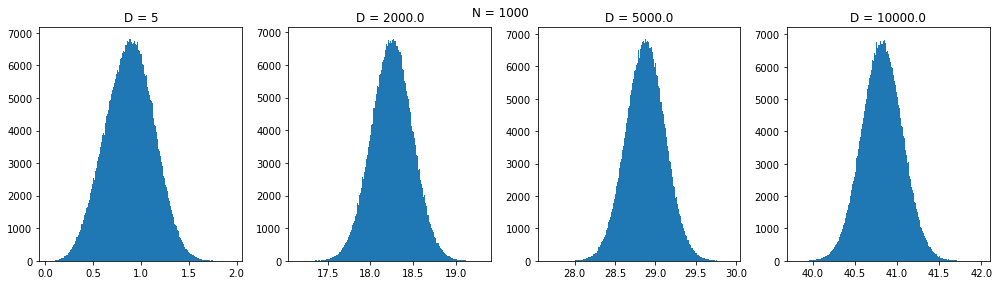

In [24]:
n = 1000
d = [5, 2e3, 5e3 , 1e4]; #, 1e6]

fig, axs = plt.subplots(1, 4, figsize = (14, 4))
fig.suptitle('N = {}'.format(n))
for l in range(4):
  dists = [];
  points = np.random.rand(int(n), int(d[l]))
  for i in range(n):
    for j in range(i+1,n):
      x = distance.euclidean(points[i],points[j])
      dists.append(x)
  axs[l].hist(dists, bins='auto') 
  axs[l].set_title('D = {}'.format(d[l]))
fig.tight_layout()
plt.show()

In a fixed number of samples, if we increase the dimension, the shape of the distribution does not change much and only the scale of distances becomes larger because the squares of the distances add up in each dimension. So this dimension increase does not help us to model more accurately and only makes the calculations more complex and time consuming.

### Part b)

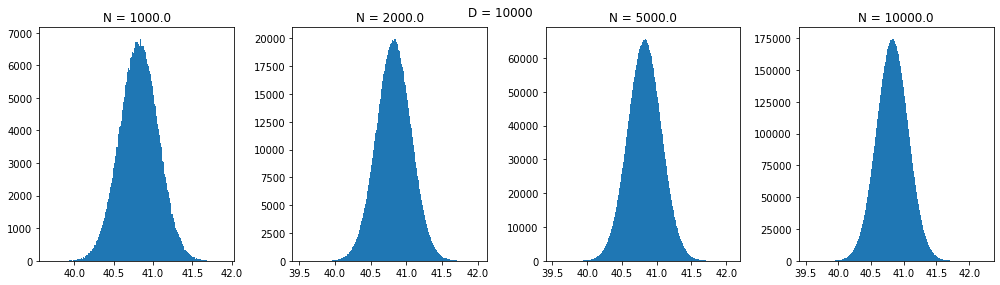

In [26]:
d = 10000
n = [1e3, 2e3, 5e3 , 1e4]; #, 1e6]
dists = [];

fig, axs = plt.subplots(1, 4, figsize = (14, 4))
fig.suptitle('D = {}'.format(d))
for l in range(4):
  points = np.random.rand(int(n[l]), int(d))
  for i in range(int(n[l])):
    for j in range(i+1,int(n[l])):
      x = distance.euclidean(points[i],points[j])
      dists.append(x)
  axs[l].hist(dists, bins='auto') 
  axs[l].set_title('N = {}'.format(n[l]))
fig.tight_layout()
plt.show()

Increasing the number of samples in the same dimension makes the histogram smoother and closer to the original model, which is a Gaussian distribution, but this increase does not change the number of distances. So overall, increasing the number of samples makes the distribution more accurate and smoother, but the volume and time of calculations are greatly increased.

### Part c)

Knn algorithm is a good algorithm if the number of data is enough to have the appropriate amount of data with higher dimension. If the number of data is small, the problem of dimension of curse is created. This is due to the fact that we have increased the dimensions and our input space has been enlarged and many modes have been created, but we do not have enough data to cover this space, so in some cases the probability distribution may be zero and the result with the desired value Have a distance.

## Q5) Non-Parametric Parzen Estimations

### Part a)

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/Arashlf/UT_ML_Course/main/Homework3/ted_main.csv')
data = df['duration']
data.describe()

count    2550.000000
mean      826.510196
std       374.009138
min       135.000000
25%       577.000000
50%       848.000000
75%      1046.750000
max      5256.000000
Name: duration, dtype: float64

In [31]:
def Gaussian_Kernel(x):
    sigma = 1
    mu = 0
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((x-mu) / sigma)**2))
    

In [33]:
def Estimated_PDf(x, h):
    d = 1
    Vn = h**d
    sum = 0
    for i in range(len(data)):
        sum += Gaussian_Kernel((x - data[i]) / h)
    
    return (1/len(data)) * (1/Vn) * sum

In [34]:
pdf = []
h = 10
step = 5
for x in range(-1000, data.max(), step):
    pdf.append(Estimated_PDf(x, h))

Text(0.5, 1.0, 'PDF for hn = 10')

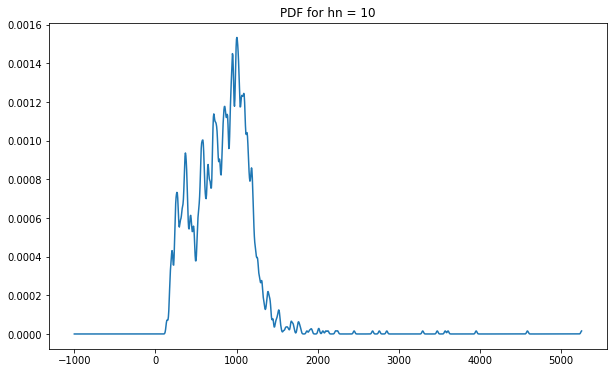

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(range(-1000, data.max(), step), pdf)
plt.title("PDF for hn = 10")

### Part b)

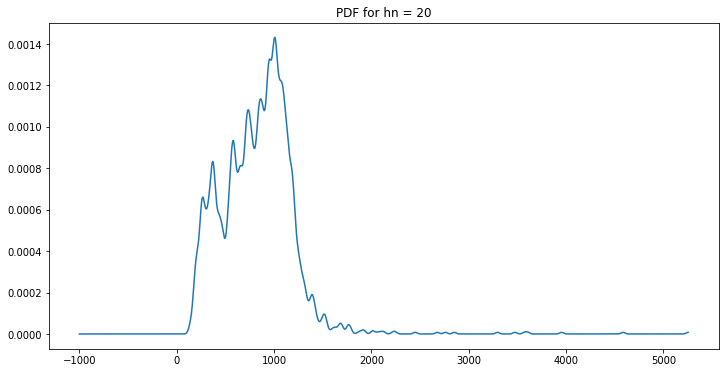

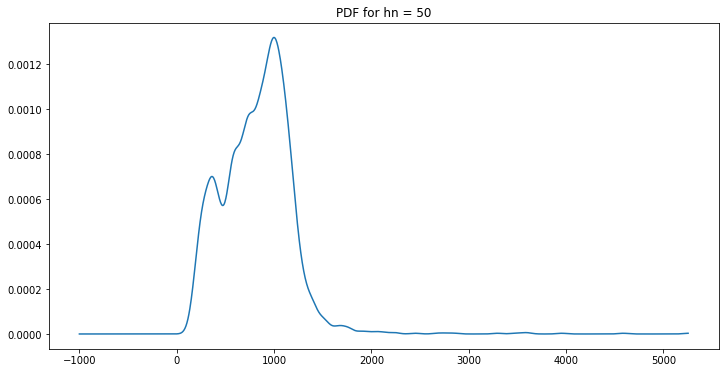

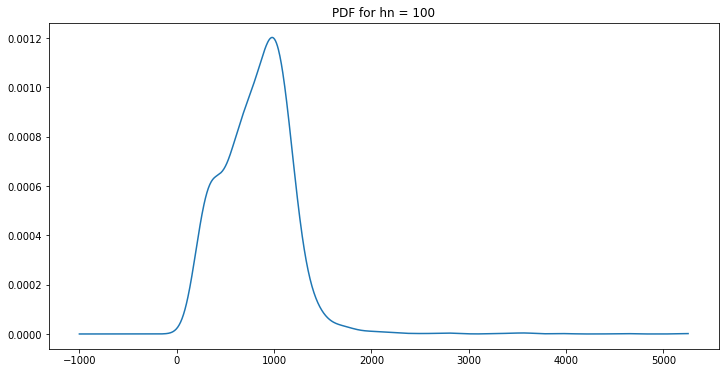

In [39]:
for h in [20, 50, 100]:
    pdf = []
    for x in range(-1000, data.max(), step):
        pdf.append(Estimated_PDf(x, h))
    plt.figure(figsize = (12, 6))
    plt.plot(range(-1000, data.max(), step), pdf)
    plt.title("PDF for hn = " + str(h))

The lower the value of h, the more spiky and noisy the function will be, and the higher the value of h, the smoother and smoother the function will be. The value of h represents the degree of collectivity of the points around the point x to obtain the probability density of the distribution x.

### Part c)

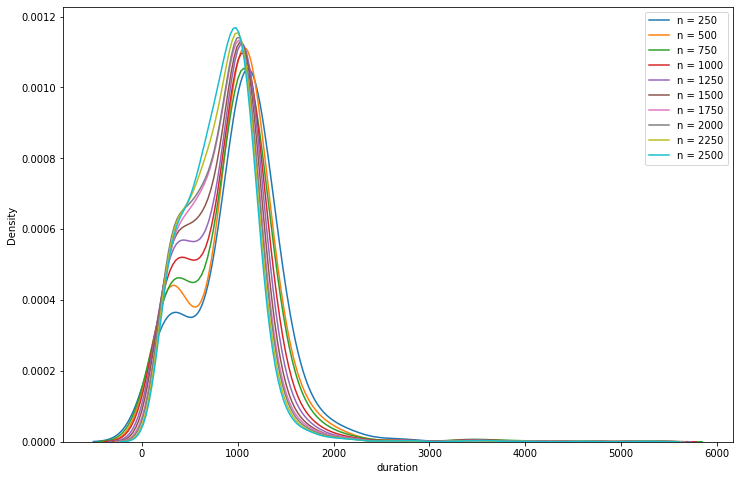

In [43]:
# Using Seaborn Library
plt.figure(figsize=(12 , 8))
i = 0
for n in range(250, len(data) + 1, 250):
   sns.kdeplot(data=data.squeeze()[:n], bw_adjust=1.5, fill=False, label='n = %d'%(n))
   i += 1
plt.legend()
plt.show()

According to the graphs, with increasing h, the function gets out of the noise and spiky mode and becomes softer. The optimal value of h can be determined according to the data distribution.

### Part d)

The diagrams obtained in Part B, which are implemented without the library, are similar to the diagrams obtained from the ready library. The only difference is in the computational speed, which the libraries do more quickly. This is because libraries can use the improved Parzen method or more efficient methods to do so, thus reducing their computational volume.

## Q6) Fashion MNIST

In [45]:
import itertools
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.datasets import fashion_mnist
from keras import layers
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.optimizers import RMSprop, Adagrad, SGD, Adam

In [46]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

X_train = X_train.astype('float64')/255
X_train_mlp = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) 
Y_train = np_utils.to_categorical(y_train)

X_test = X_test.astype('float64')/255
X_test_mlp = X_test.reshape((len(X_test), np.prod(X_test.shape[1:]))) 
Y_test = np_utils.to_categorical(y_test)

X_valid = X_valid.astype('float64')/255
X_valid_mlp = X_valid.reshape((len(X_valid), np.prod(X_valid.shape[1:])))
Y_valid = np_utils.to_categorical(y_valid)

4431872/4422102 [==============================] - 0s 0us/step


### Part a)

In [57]:
inputs = layers.Input(shape = (X_train_mlp.shape[1], ))
hidden_1 = layers.Dense(50, activation = 'relu')(inputs)
hidden_2 = layers.Dense(25, activation = 'relu')(hidden_1)
hidden_3 = layers.Dense(25, activation = 'relu')(hidden_2)
outputs = layers.Dense(10, activation = 'softmax')(hidden_3)
model = Model(inputs, outputs)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.6269 - accuracy: 0.7811 - val_loss: 0.4282 - val_accuracy: 0.8479
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4298 - accuracy: 0.8443 - val_loss: 0.3801 - val_accuracy: 0.8627
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3843 - accuracy: 0.8606 - val_loss: 0.3812 - val_accuracy: 0.8605
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3574 - accuracy: 0.8697 - val_loss: 0.3662 - val_accuracy: 0.8698
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.8761 - val_loss: 0.3467 - val_accuracy: 0.8763
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3261 - accuracy: 0.8805 - val_loss: 0.3409 - val_accuracy: 0.8760
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3135 - accuracy: 0.8856 - val_loss: 0.3648 - val_accuracy: 0.8723
Epoch 

In [58]:
test_val = model.evaluate(X_test_mlp, Y_test)
print('Test Accuracy = {:.3f}'.format(test_val[1]))
print('Test Loss = {:.3f}'.format(test_val[0]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8792
Test Accuracy = 0.879
Test Loss = 0.381


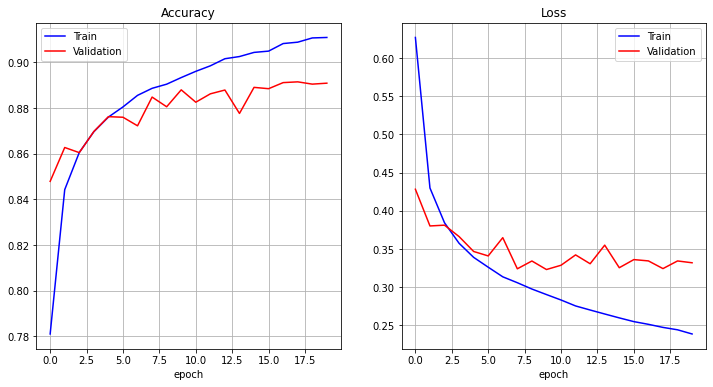

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

axs[0].plot(history.history['accuracy'], 'b')
axs[0].plot(history.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()

axs[1].plot(history.history['loss'], 'b')
axs[1].plot(history.history['val_loss'], 'r')
axs[1].set_title('Loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

We add a neural network with three hidden layers whose number of neurons are 50 and 25 and the last layer with 10 neurons.

### Part b)

#### Hidden Layers:

In [60]:
inputs = layers.Input(shape = (X_train_mlp.shape[1], ))
hidden_1 = layers.Dense(50, activation = 'relu')(inputs)
outputs = layers.Dense(10, activation = 'softmax')(hidden_1)
model_1hidden = Model(inputs, outputs)
model_1hidden.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_1hidden = model_1hidden.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

hidden_1 = layers.Dense(50, activation = 'relu')(inputs)
hidden_2 = layers.Dense(25, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_2hidden = Model(inputs, outputs)
model_2hidden.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_2hidden = model_2hidden.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

hidden_1 = layers.Dense(50, activation = 'relu')(inputs)
hidden_2 = layers.Dense(25, activation = 'relu')(hidden_1)
hidden_3 = layers.Dense(25, activation = 'relu')(hidden_2)
hidden_4 = layers.Dense(25, activation = 'relu')(hidden_3)
outputs = layers.Dense(10, activation = 'softmax')(hidden_4)
model_4hidden = Model(inputs, outputs)
model_4hidden.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_4hidden = model_4hidden.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.5918 - accuracy: 0.7968 - val_loss: 0.4409 - val_accuracy: 0.8526
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4304 - accuracy: 0.8474 - val_loss: 0.4065 - val_accuracy: 0.8588
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3892 - accuracy: 0.8604 - val_loss: 0.3805 - val_accuracy: 0.8673
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3625 - accuracy: 0.8703 - val_loss: 0.3667 - val_accuracy: 0.8720
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3453 - accuracy: 0.8775 - val_loss: 0.3522 - val_accuracy: 0.8772
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3312 - accuracy: 0.8816 - val_loss: 0.3521 - val_accuracy: 0.8792
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3188 - accuracy: 0.8841 - val_loss: 0.3448 - val_accuracy: 0.8774
Epoch 

In [63]:
test_val = model_1hidden.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (hidden layers = 1) = {:.3f}'.format(test_val[1]))
print('Test Loss (hidden layers = 1) = {:.3f}\n'.format(test_val[0]))

test_val = model_2hidden.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (hidden layers = 2) = {:.3f}'.format(test_val[1]))
print('Test Loss (hidden layers = 2) = {:.3f}\n'.format(test_val[0]))

test_val = model_4hidden.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (hidden layers = 4) = {:.3f}'.format(test_val[1]))
print('Test Loss (hidden layers = 4) = {:.3f}'.format(test_val[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8713
Test Accuracy (hidden layers = 1) = 0.871
Test Loss (hidden layers = 1) = 0.383

313/313 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8753
Test Accuracy (hidden layers = 2) = 0.875
Test Loss (hidden layers = 2) = 0.396

313/313 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8707
Test Accuracy (hidden layers = 4) = 0.871
Test Loss (hidden layers = 4) = 0.400


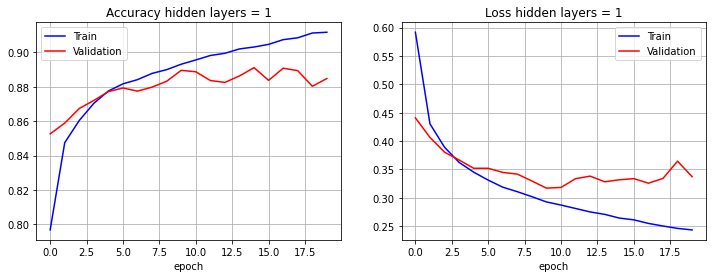

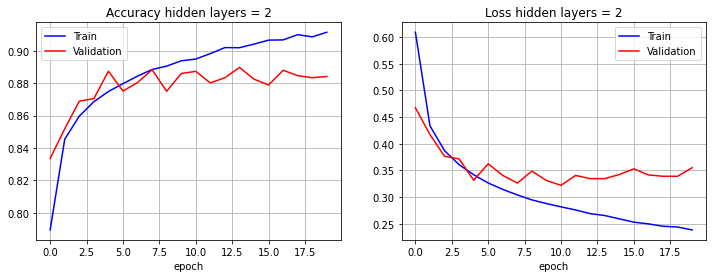

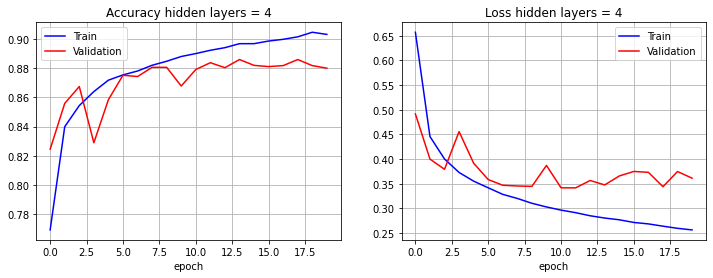

In [64]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_1hidden.history['accuracy'], 'b')
axs[0].plot(history_1hidden.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy hidden layers = 1')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_1hidden.history['loss'], 'b')
axs[1].plot(history_1hidden.history['val_loss'], 'r')
axs[1].set_title('Loss hidden layers = 1')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_2hidden.history['accuracy'], 'b')
axs[0].plot(history_2hidden.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy hidden layers = 2')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_2hidden.history['loss'], 'b')
axs[1].plot(history_2hidden.history['val_loss'], 'r')
axs[1].set_title('Loss hidden layers = 2')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_4hidden.history['accuracy'], 'b')
axs[0].plot(history_4hidden.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy hidden layers = 4')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_4hidden.history['loss'], 'b')
axs[1].plot(history_4hidden.history['val_loss'], 'r')
axs[1].set_title('Loss hidden layers = 4')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

Increasing the number of hidden layers makes the model more complex and can give us higher accuracy. But because the delays of each layer add up with the next layer, it takes more time (number of epochs) to achieve the right accuracy. So here we have a limited number of epochs, the accuracy of the neural network with 2 hidden layers is higher than the rest, so we go with the neural network with 2 hidden layers.

#### Number of Neurons:
Best Hidden Layer yet = 2

In [65]:
inputs = layers.Input(shape = (X_train_mlp.shape[1], ))
hidden_1 = layers.Dense(50, activation = 'relu')(inputs)
hidden_2 = layers.Dense(50, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_50neurons = Model(inputs, outputs)
model_50neurons.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_50neurons = model_50neurons.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

hidden_1 = layers.Dense(100, activation = 'relu')(inputs)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_100neurons = Model(inputs, outputs)
model_100neurons.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_100neurons = model_100neurons.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

hidden_1 = layers.Dense(150, activation = 'relu')(inputs)
hidden_2 = layers.Dense(150, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_150neurons = Model(inputs, outputs)
model_150neurons.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_150neurons = model_150neurons.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5807 - accuracy: 0.7976 - val_loss: 0.4551 - val_accuracy: 0.8329
Epoch 2/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4136 - accuracy: 0.8484 - val_loss: 0.4149 - val_accuracy: 0.8507
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3741 - accuracy: 0.8633 - val_loss: 0.3646 - val_accuracy: 0.8683
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3500 - accuracy: 0.8723 - val_loss: 0.3720 - val_accuracy: 0.8698
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3341 - accuracy: 0.8770 - val_loss: 0.3449 - val_accuracy: 0.8768
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3190 - accuracy: 0.8843 - val_loss: 0.3282 - val_accuracy: 0.8858
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3084 - accuracy: 0.8865 - val_loss: 0.3195 - val_accuracy: 0.8846
Epoch 

In [66]:
test_val = model_50neurons.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (50) = {:.3f}'.format(test_val[1]))
print('Test Loss (50) = {:.3f}\n'.format(test_val[0]))

test_val = model_100neurons.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (100) = {:.3f}'.format(test_val[1]))
print('Test Loss (100) = {:.3f}\n'.format(test_val[0]))

test_val = model_150neurons.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (150) = {:.3f}'.format(test_val[1]))
print('Test Loss (150) = {:.3f}'.format(test_val[0]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8773
Test Accuracy (50) = 0.877
Test Loss (50) = 0.394

313/313 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.8730
Test Accuracy (100) = 0.873
Test Loss (100) = 0.499

313/313 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.8672
Test Accuracy (150) = 0.867
Test Loss (150) = 0.586


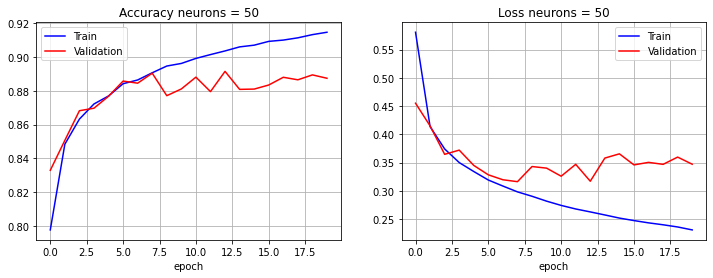

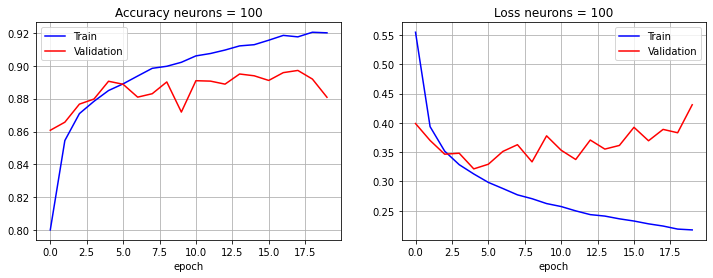

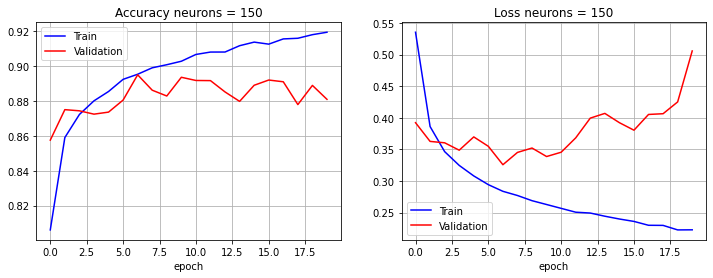

In [67]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_50neurons.history['accuracy'], 'b')
axs[0].plot(history_50neurons.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy neurons = 50')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_50neurons.history['loss'], 'b')
axs[1].plot(history_50neurons.history['val_loss'], 'r')
axs[1].set_title('Loss neurons = 50')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_100neurons.history['accuracy'], 'b')
axs[0].plot(history_100neurons.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy neurons = 100')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_100neurons.history['loss'], 'b')
axs[1].plot(history_100neurons.history['val_loss'], 'r')
axs[1].set_title('Loss neurons = 100')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_150neurons.history['accuracy'], 'b')
axs[0].plot(history_150neurons.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy neurons = 150')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_150neurons.history['loss'], 'b')
axs[1].plot(history_150neurons.history['val_loss'], 'r')
axs[1].set_title('Loss neurons = 150')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

Increasing the number of hidden layer nodes also increases the complexity of the model. For modes where the real model is very complex, this increase in the number of neurons increases the accuracy, but increasing this number does not increase the accuracy too much. So we go with the 100 neurons in each layer.

#### Solver:
Best Hidden Layer yet = 2

Best Neurons yet = 100

In [69]:
# SGD
inputs = layers.Input(shape = (X_train_mlp.shape[1], ))
hidden_1 = layers.Dense(100, activation = 'relu')(inputs)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_sgd = Model(inputs, outputs)
model_sgd.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history_sgd = model_sgd.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

# ADAM
hidden_1 = layers.Dense(100, activation = 'relu')(inputs)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_adam = Model(inputs, outputs)
model_adam.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_adam = model_adam.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

# RMSprop
hidden_1 = layers.Dense(100, activation = 'relu')(inputs)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_rmsprop = Model(inputs, outputs)
model_rmsprop.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 1.0016 - accuracy: 0.6767 - val_loss: 0.6628 - val_accuracy: 0.7806
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6008 - accuracy: 0.7972 - val_loss: 0.5475 - val_accuracy: 0.8197
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5272 - accuracy: 0.8191 - val_loss: 0.5091 - val_accuracy: 0.8302
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4896 - accuracy: 0.8302 - val_loss: 0.4807 - val_accuracy: 0.8331
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4677 - accuracy: 0.8363 - val_loss: 0.4574 - val_accuracy: 0.8415
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4506 - accuracy: 0.8424 - val_loss: 0.4441 - val_accuracy: 0.8496
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4379 - accuracy: 0.8463 - val_loss: 0.4475 - val_accuracy: 0.8451
Epoch 

In [70]:
test_val = model_sgd.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (SGD) = {:.3f}'.format(test_val[1]))
print('Test Loss (SGD) = {:.3f}\n'.format(test_val[0]))

test_val = model_adam.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (ADAM) = {:.3f}'.format(test_val[1]))
print('Test Loss (ADAM) = {:.3f}\n'.format(test_val[0]))

test_val = model_rmsprop.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (RMS) = {:.3f}'.format(test_val[1]))
print('Test Loss (RMS) = {:.3f}'.format(test_val[0]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8549
Test Accuracy (SGD) = 0.855
Test Loss (SGD) = 0.408

313/313 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8801
Test Accuracy (ADAM) = 0.880
Test Loss (ADAM) = 0.385

313/313 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8821
Test Accuracy (RMS) = 0.882
Test Loss (RMS) = 0.459


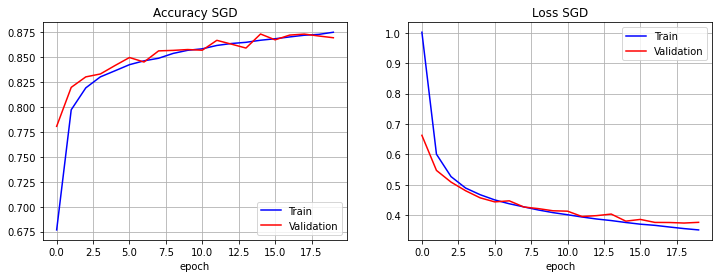

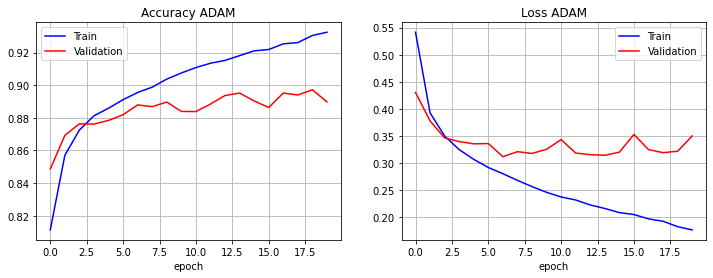

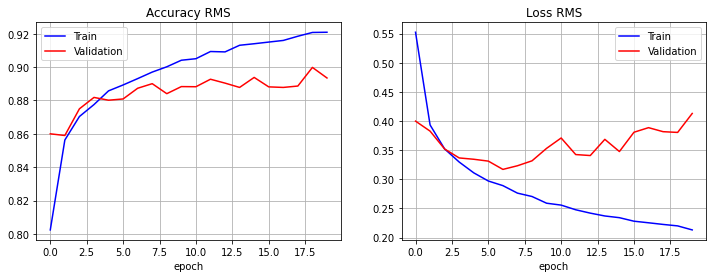

In [72]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_sgd.history['accuracy'], 'b')
axs[0].plot(history_sgd.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy SGD')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_sgd.history['loss'], 'b')
axs[1].plot(history_sgd.history['val_loss'], 'r')
axs[1].set_title('Loss SGD')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_adam.history['accuracy'], 'b')
axs[0].plot(history_adam.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy ADAM')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_adam.history['loss'], 'b')
axs[1].plot(history_adam.history['val_loss'], 'r')
axs[1].set_title('Loss ADAM')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_rmsprop.history['accuracy'], 'b')
axs[0].plot(history_rmsprop.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy RMS')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_rmsprop.history['loss'], 'b')
axs[1].plot(history_rmsprop.history['val_loss'], 'r')
axs[1].set_title('Loss RMS')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

Optimizer are the methods by which we determine the weights and learning rate of the neural network in such a way as to produce the least error. According to the accuracy values obtained, the Adam optimizer performs better than the other two. This optimizer uses the descent gradient method, so it is the best solver.

#### Learning Rate:
Best Hidden Layer yet = 2

Best Neurons yet = 100

Best Optimizer = ADAM

In [73]:
inputs = layers.Input(shape = (X_train_mlp.shape[1], ))
hidden_1 = layers.Dense(100, activation = 'relu')(inputs)
hidden_2 = layers.Dense(100, activation = 'relu')(hidden_1)
outputs = layers.Dense(10, activation = 'softmax')(hidden_2)
model_1 = Model(inputs, outputs)
model_1.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])
history_1 = model_1.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

model_2 = Model(inputs, outputs)
model_2.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.01), metrics = ['accuracy'])
history_2 = model_2.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

model_3 = Model(inputs, outputs)
model_3.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.1), metrics = ['accuracy'])
history_3 = model_3.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

model_4 = Model(inputs, outputs)
model_4.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.5), metrics = ['accuracy'])
history_4 = model_4.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))

model_5 = Model(inputs, outputs)
model_5.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.9), metrics = ['accuracy'])
history_5 = model_5.fit(X_train_mlp, Y_train, batch_size = 64, epochs = 20, validation_data = (X_valid_mlp, Y_valid))


Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5412 - accuracy: 0.8091 - val_loss: 0.4616 - val_accuracy: 0.8307
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3918 - accuracy: 0.8579 - val_loss: 0.3556 - val_accuracy: 0.8698
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8716 - val_loss: 0.3319 - val_accuracy: 0.8803
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3258 - accuracy: 0.8783 - val_loss: 0.3517 - val_accuracy: 0.8773
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3085 - accuracy: 0.8843 - val_loss: 0.3074 - val_accuracy: 0.8924
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2898 - accuracy: 0.8919 - val_loss: 0.3236 - val_accuracy: 0.8881
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2798 - accuracy: 0.8954 - val_loss: 0.3247 - val_accuracy: 0.8852
Epoch 

In [76]:
test_val = model_1.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (0.001) = {:.3f}'.format(test_val[1]))
print('Test Loss (0.001) = {:.3f}\n'.format(test_val[0]))

test_val = model_2.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (0.01) = {:.3f}'.format(test_val[1]))
print('Test Loss (0.01) = {:.3f}\n'.format(test_val[0]))

test_val = model_3.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (0.1) = {:.3f}'.format(test_val[1]))
print('Test Loss (0.1) = {:.3f}\n'.format(test_val[0]))

test_val = model_4.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (0.5) = {:.3f}'.format(test_val[1]))
print('Test Loss (0.5) = {:.3f}\n'.format(test_val[0]))

test_val = model_5.evaluate(X_test_mlp, Y_test)
print('Test Accuracy (0.9) = {:.3f}'.format(test_val[1]))
print('Test Loss (0.9) = {:.3f}\n'.format(test_val[0]))

313/313 [==============================] - 0s 1ms/step - loss: 2.3285 - accuracy: 0.1000
Test Accuracy (0.001) = 0.100
Test Loss (0.001) = 2.328

313/313 [==============================] - 0s 1ms/step - loss: 2.3285 - accuracy: 0.1000
Test Accuracy (0.01) = 0.100
Test Loss (0.01) = 2.328

313/313 [==============================] - 0s 1ms/step - loss: 2.3285 - accuracy: 0.1000
Test Accuracy (0.1) = 0.100
Test Loss (0.1) = 2.328

313/313 [==============================] - 0s 1ms/step - loss: 2.3285 - accuracy: 0.1000
Test Accuracy (0.5) = 0.100
Test Loss (0.5) = 2.328

313/313 [==============================] - 0s 1ms/step - loss: 2.3285 - accuracy: 0.1000
Test Accuracy (0.9) = 0.100
Test Loss (0.9) = 2.328



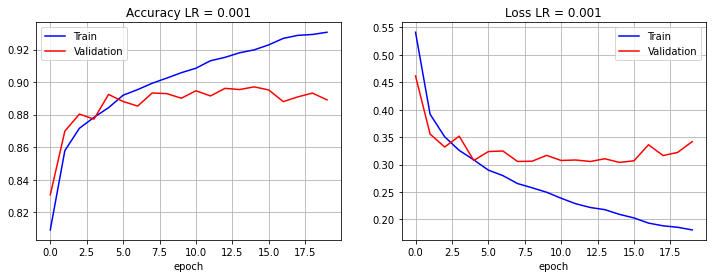

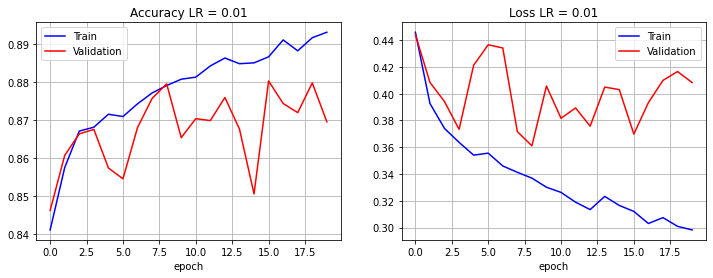

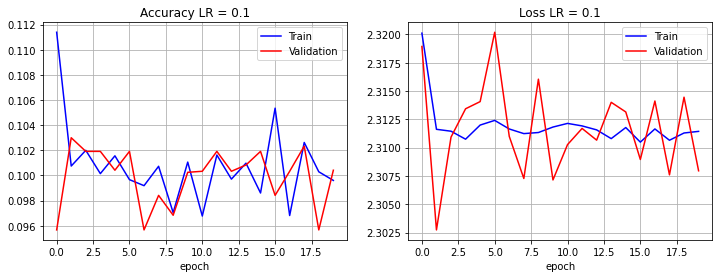

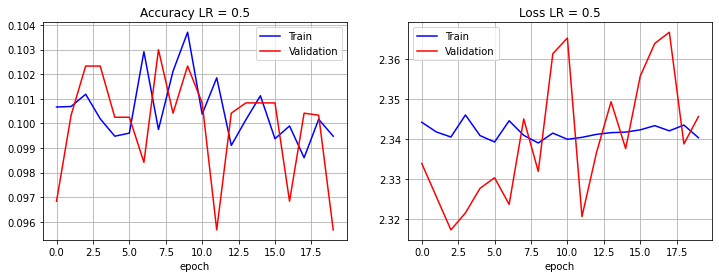

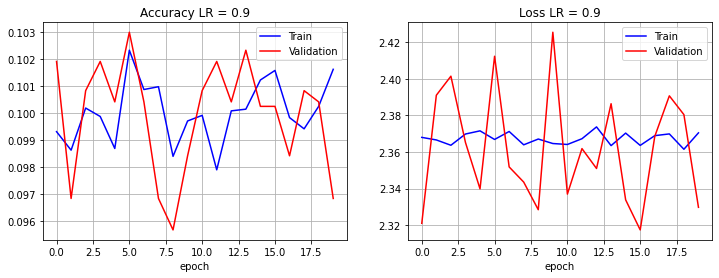

In [75]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_1.history['accuracy'], 'b')
axs[0].plot(history_1.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy LR = 0.001')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_1.history['loss'], 'b')
axs[1].plot(history_1.history['val_loss'], 'r')
axs[1].set_title('Loss LR = 0.001')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()


fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_2.history['accuracy'], 'b')
axs[0].plot(history_2.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy LR = 0.01')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_2.history['loss'], 'b')
axs[1].plot(history_2.history['val_loss'], 'r')
axs[1].set_title('Loss LR = 0.01')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_3.history['accuracy'], 'b')
axs[0].plot(history_3.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy LR = 0.1')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_3.history['loss'], 'b')
axs[1].plot(history_3.history['val_loss'], 'r')
axs[1].set_title('Loss LR = 0.1')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_4.history['accuracy'], 'b')
axs[0].plot(history_4.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy LR = 0.5')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_4.history['loss'], 'b')
axs[1].plot(history_4.history['val_loss'], 'r')
axs[1].set_title('Loss LR = 0.5')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(history_5.history['accuracy'], 'b')
axs[0].plot(history_5.history['val_accuracy'], 'r')
axs[0].set_title('Accuracy LR = 0.9')
axs[0].set_xlabel('epoch')
axs[0].legend(['Train', 'Validation'])
axs[0].grid()
axs[1].plot(history_5.history['loss'], 'b')
axs[1].plot(history_5.history['val_loss'], 'r')
axs[1].set_title('Loss LR = 0.9')
axs[1].set_xlabel('epoch')
axs[1].legend(['Train', 'Validation'])
axs[1].grid()

Increasing the learning rate makes the steps bigger until you reach the optimal point. However, if this high rate is selected, it can cause the neural network to diverge, so as the epochs move forward, the network moves further away from the optimal point and its error increases sharply (which happened at a high rate of 1.0). On the other hand, the small learning rate allows the network to reach the optimal point slowly and take a long time. As a result, we have to find a middle rate with respect to this off-trade that RL = 0.01 is a good value.

### Part c)
Best Hidden Layer yet = 2

Best Neurons yet = 100

Best Optimizer = ADAM

Best Learning Rate = 0.01

## Q7) 

## Q8) 